<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:red;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:white;
              text-align:center;'>
        ZOMATO ANALYTICS
    </h2>
    </div>

![](https://etimg.etb2bimg.com/photo/93481728.cms)

### 1. Importing the Necessary Libraries

In [2]:
import pandas as pd  #to manipulate the data we use pandas 

import numpy as np   #NumPy can be used to perform a wide variety of mathematical operations on arrays.

import matplotlib.pyplot as plt #Matplotlib is a comprehensive library for creating static, animated, and interactive 
                                       # visualizations in Python. Matplotlib makes easy things easy and hard things possible.
    
import seaborn as sns     #Seaborn library is a widely popular data visualization library that is commonly used for 
                                         #data science and machine learning tasks.
from warnings import filterwarnings  ## filter the Warning 
filterwarnings('ignore')

### 2. Loading the Dataset


In [3]:
df=pd.read_csv(r"E:\Big data set\zomato\zomato.csv") #read the data from zomato dataset using pandans
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.columns #checking columns 

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [4]:
df.shape

(51717, 17)

### 3. EDA [Exploratory Data Analysis]


### Removing unnecessary columns 

In [5]:
df['menu_item'].head() # this column does't have any information

0    []
1    []
2    []
3    []
4    []
Name: menu_item, dtype: object

In [6]:
df.dish_liked.head(2)

0    Pasta, Lunch Buffet, Masala Papad, Paneer Laja...
1    Momos, Lunch Buffet, Chocolate Nirvana, Thai G...
Name: dish_liked, dtype: object

In [7]:
df.dish_liked.isnull().sum() # this column has lots of null value 

28078

In [8]:
data=df.drop(['menu_item','url','phone','address','dish_liked','menu_item','reviews_list','listed_in(city)'],axis=1)

# if i can use  inplace = True it effect my origenal data

data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


### cheching information about data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


In [10]:
data.shape #51717 columns and 10 rows

(51717, 10)

### check duplicated

In [11]:
data.duplicated() # checking duplicates records

0        False
1        False
2        False
3        False
4        False
         ...  
51712    False
51713    False
51714    False
51715    False
51716    False
Length: 51717, dtype: bool

In [12]:
data[data.duplicated()] # show the duplicated record which we have

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
596,My Tea House,Yes,Yes,NEW,0,Banashankari,Casual Dining,"Continental, Asian, North Indian, Tea",500,Dine-out
2235,Shiv Sagar,No,No,3.6/5,10,Bannerghatta Road,Food Court,"South Indian, Beverages",400,Dine-out
2482,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet
2483,Timepass Dinner,Yes,No,3.8/5,286,Basavanagudi,Casual Dining,North Indian,600,Buffet
2488,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
...,...,...,...,...,...,...,...,...,...,...
51633,Re:fuel- Aloft Bengaluru Cessna Business Park,No,No,NaN,0,Bellandur,"Cafe, Bakery","Bakery, Beverages, Cafe, Coffee, Desserts, San...","1,000",Dine-out
51637,The Crunch,No,No,3.3 /5,6,Brookefield,Beverage Shop,Beverages,300,Dine-out
51639,Kale Cafe,No,No,NaN,0,Brookefield,Quick Bites,"Fast Food, Kerala",100,Dine-out
51642,Basaveshwara Khanavali,No,No,NaN,0,Brookefield,Quick Bites,South Indian,200,Dine-out



### drop the duplicates 

In [13]:
data.drop_duplicates(keep='first',inplace=True) # inplace is true means it effect original data

In [14]:
data.shape

(35011, 10)

In [15]:
data.isnull().sum() #check the whether data has null value or not if it has null records then count the records

name                              0
online_order                      0
book_table                        0
rate                           3770
votes                             0
location                         14
rest_type                       156
cuisines                         33
approx_cost(for two people)     221
listed_in(type)                   0
dtype: int64

In [16]:
null_values = {i:data[i].isnull().sum() for i in data.columns} #it is same has privious code in deffirent way

null_values

{'name': 0,
 'online_order': 0,
 'book_table': 0,
 'rate': 3770,
 'votes': 0,
 'location': 14,
 'rest_type': 156,
 'cuisines': 33,
 'approx_cost(for two people)': 221,
 'listed_in(type)': 0}

In [17]:
empty_data = data.isnull().sum() #just i want to show only null value 
empty_data[empty_data>0]

rate                           3770
location                         14
rest_type                       156
cuisines                         33
approx_cost(for two people)     221
dtype: int64

In [18]:
data[data.isnull().any(axis=1)] #it shows the all null value 

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
84,Chill Out,No,No,NaN,0,Banashankari,Quick Bites,"South Indian, Chinese",100,Delivery
90,Me And My Cake,No,No,NaN,0,Banashankari,Delivery,"Bakery, Desserts",500,Delivery
91,Sunsadm,No,No,NaN,0,Banashankari,"Takeaway, Delivery",South Indian,400,Delivery
92,Annapooraneshwari Mess,No,No,NaN,0,Banashankari,Mess,South Indian,200,Delivery
107,Coffee Shopee,No,No,NaN,0,Banashankari,"Takeaway, Delivery",Beverages,250,Delivery
...,...,...,...,...,...,...,...,...,...,...
51644,Punjabi Thadka,No,No,NaN,0,Brookefield,Quick Bites,North Indian,400,Dine-out
51675,Topsy Turvey,No,No,NaN,0,Whitefield,Bar,Finger Food,900,Drinks & nightlife
51710,Topsy Turvey,No,No,NaN,0,Whitefield,Bar,Finger Food,900,Pubs and bars
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600,Pubs and bars



### visualization null values by using heatmap

<Axes: >

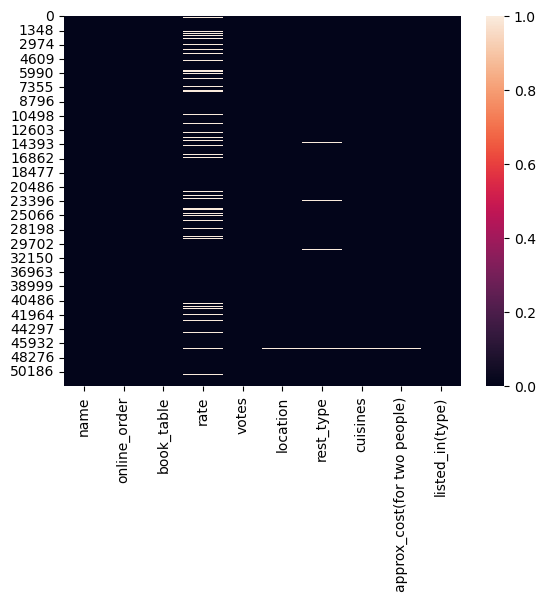

In [19]:
sns.heatmap(data.isnull())


# cleaning the Rate column


In [20]:
print("There are {} values are unique in Rate Columns".format(len(data["rate"].unique())))
                                #it gives the length of the unique value in the rate column

data["rate"].unique() #it shows unique value in the rate column

There are 65 values are unique in Rate Columns


array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

### i noted that i want chenge object datatype to float datatype and some string value "NEW","-" to Nan and i don't want that "/5"

In [21]:
def rate(data):                          #using function and function name is data
    if data == "NEW" or data == "-":     #if any columns have "NEW","-" it convert to nun
        return np.nan                    #NumPy NAN stands for not a number and is defined as a substitute for declaring value
                                                   #which are numerical values that are missing values in an array 
    else:                                   
        data = str(data).split("/")       # i split the data "/"
        data = data[0]                     
        return float(data)                  #it returns float

In [22]:
data["rate"].apply(rate) #here we can see i removed "/5" and i converted object to float because i should float type not object

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 35011, dtype: float64

In [23]:
data["rate"] = data["rate"].apply(rate)  # the result of the function i declare to rate column in original data

<Axes: >

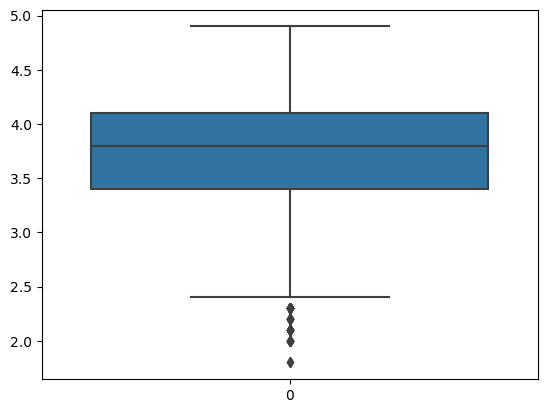

In [24]:
sns.boxplot(data.rate) # just i want to see wheather my column has extreme outliers then the column's data is good 

In [25]:
#Now replace null value with the mean value that complete rate column

data["rate"] = data["rate"].fillna(data["rate"].mean()) #fillna file the all nun values

## rate column has zero null value now

In [26]:
data.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        14
rest_type                      156
cuisines                        33
approx_cost(for two people)    221
listed_in(type)                  0
dtype: int64

In [27]:
data.rest_type.nunique()

93

In [28]:
data[data.rest_type.isna()]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
999,Mughlai Kitchen,Yes,No,3.500000,269,BTM,NaN,"Mughlai, North Indian, Chinese, Momos",600,Delivery
1300,Eat & Joy Restaurant,Yes,No,3.000000,7,JP Nagar,NaN,"Fast Food, Finger Food",300,Delivery
1376,Kababish Restaurant,Yes,No,3.600000,15,BTM,NaN,"North Indian, Chinese, Arabian",700,Delivery
1565,Goli Vada Pav No 1,No,No,3.730491,0,Bannerghatta Road,NaN,"Street Food, Burger",150,Delivery
1637,Ammi's Biryani,No,No,2.400000,392,Bannerghatta Road,NaN,"Biryani, North Indian",500,Delivery
...,...,...,...,...,...,...,...,...,...,...
50838,Vijayawada Heights,Yes,No,3.200000,8,Whitefield,NaN,North Indian,600,Delivery
50978,Snack Itt,No,No,3.730491,0,Whitefield,NaN,Bakery,200,Desserts
51130,Pindi Bangalore,Yes,No,3.730491,0,Whitefield,NaN,"North Indian, Chinese, Biryani, Street Food",900,Dine-out
51195,Special Biryani House,Yes,No,3.200000,202,Whitefield,NaN,"North Indian, Biryani, Chinese",400,Dine-out


In [29]:
 #  Take most occured category in that vairable (.mode())
Mode_Category =data['rest_type'].mode()[0]

In [30]:
# Replace NAN values with most occured category in actual vairable
data['rest_type'].fillna(Mode_Category,inplace=True)

In [31]:
data.rest_type.isna().sum()

0

In [32]:
data.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        14
rest_type                        0
cuisines                        33
approx_cost(for two people)    221
listed_in(type)                  0
dtype: int64

In [33]:
data[data.location.isnull()] # here i check that "location	rest_type	cuisines	approx_cost(for two people)" 
                                #these all columns have null values. i should remove those null values

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
1662,Papa Khan Rasoi,No,No,3.730491,0,NaN,Quick Bites,NaN,NaN,Delivery
13693,Mohabbat Desi Restaurant,No,No,3.730491,0,NaN,Quick Bites,NaN,NaN,Delivery
16351,Desi Chatkara,No,No,3.730491,0,NaN,Quick Bites,NaN,NaN,Delivery
26432,New Taj Biryani Centre,No,No,3.730491,0,NaN,Quick Bites,NaN,NaN,Dine-out
26519,AB's - Absolute Barbecues,No,No,3.730491,0,NaN,Quick Bites,NaN,NaN,Buffet
27672,Manchow,No,No,3.730491,0,NaN,Quick Bites,NaN,NaN,Delivery
28611,Manchow,No,No,3.730491,0,NaN,Quick Bites,NaN,NaN,Dine-out
33457,La Lunch Box,No,No,3.730491,0,NaN,Quick Bites,NaN,NaN,Delivery
40354,The Happy Vegetarian,No,No,3.730491,0,NaN,Quick Bites,NaN,NaN,Dine-out
40556,Risalo Restaurant,No,No,3.730491,0,NaN,Quick Bites,NaN,NaN,Cafes


In [34]:
data.dropna(subset=['location'],inplace=True)

In [35]:
data.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                         0
rest_type                        0
cuisines                        19
approx_cost(for two people)    207
listed_in(type)                  0
dtype: int64

In [36]:
data[data.cuisines.isnull()]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
438,The House Of Vadapav,Yes,No,3.730491,0,Banashankari,Quick Bites,NaN,150,Delivery
440,Lassi Spot,Yes,No,3.300000,4,Kumaraswamy Layout,Beverage Shop,NaN,100,Delivery
759,The House Of Vadapav,Yes,No,3.730491,0,Banashankari,Quick Bites,NaN,150,Dine-out
4037,Chai Point,Yes,No,3.730491,0,Marathahalli,"Beverage Shop, Quick Bites",NaN,200,Delivery
6887,Noodle Oodle,Yes,No,3.600000,9,Whitefield,Delivery,NaN,400,Delivery
6897,Taste of Chettinad,Yes,No,3.730491,0,Whitefield,Delivery,NaN,400,Delivery
7277,Watheen Nuts,No,No,3.730491,0,Whitefield,"Takeaway, Delivery",NaN,400,Delivery
7555,Delhi Food Factory,Yes,No,3.730491,0,Marathahalli,Delivery,NaN,500,Delivery
13591,Delhi Food Factory,Yes,No,3.730491,0,Electronic City,Delivery,NaN,500,Delivery
22974,Delhi Food Factory,No,No,3.730491,0,Kumaraswamy Layout,Delivery,NaN,500,Delivery


In [37]:
Mode_Category =data['cuisines'].mode()[0]
data['cuisines'].fillna(Mode_Category,inplace=True)

In [38]:
data.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                         0
rest_type                        0
cuisines                         0
approx_cost(for two people)    207
listed_in(type)                  0
dtype: int64

In [39]:
data[data['approx_cost(for two people)'].isnull()]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
1768,Innate,No,No,3.730491,0,JP Nagar,Delivery,Beverages,NaN,Delivery
1795,Super Chef's (New Royal treat),No,No,3.730491,0,Bannerghatta Road,Quick Bites,"North Indian, Chinese, South Indian",NaN,Delivery
3069,Super Chef's (New Royal treat),No,No,3.730491,0,Bannerghatta Road,Quick Bites,"North Indian, Chinese, South Indian",NaN,Delivery
3774,The Hub - Ibis Bengaluru,No,No,3.900000,237,Marathahalli,Bar,Finger Food,NaN,Buffet
3954,North Indian Kitchen,No,No,3.200000,13,HSR,Takeaway,North Indian,NaN,Delivery
...,...,...,...,...,...,...,...,...,...,...
50764,Innate,No,No,3.730491,0,Whitefield,Delivery,Beverages,NaN,Delivery
50940,Cinnabon,No,No,4.000000,80,Whitefield,Quick Bites,"Beverages, American, Bakery",NaN,Desserts
51247,Mast Kalandar,No,No,2.600000,76,Whitefield,Casual Dining,North Indian,NaN,Dine-out
51271,Karavalli Food Court,No,No,3.200000,4,Whitefield,Casual Dining,South Indian,NaN,Dine-out


In [40]:
# Rename columns

data.rename(columns = {"approx_cost(for two people)":"Cost2plate","listed_in(type)":"Type"},inplace = True)

In [41]:
data.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plate,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet


## cleaning the Cost2plate column

In [42]:
data["Cost2plate"].unique() #show the unique values

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [43]:
def remove_comma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',', '')
        return float(value)
    else:
        return float(value)

In [44]:
data['Cost2plate'].apply(remove_comma)

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51712    1500.0
51713     600.0
51714    2000.0
51715    2500.0
51716    1500.0
Name: Cost2plate, Length: 34997, dtype: float64

In [45]:
data['Cost2plate']=data['Cost2plate'].apply(remove_comma) # result data assigned to cost2plate column in the original data

**the Cost2plate column is cleaned now**

<Axes: >

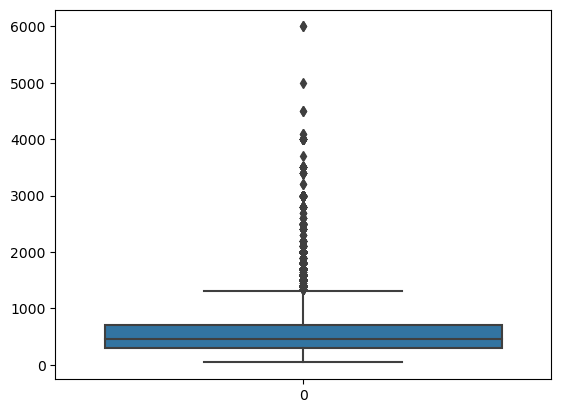

In [46]:
sns.boxplot(data.Cost2plate)

# i want to check outlies in my data

<Axes: >

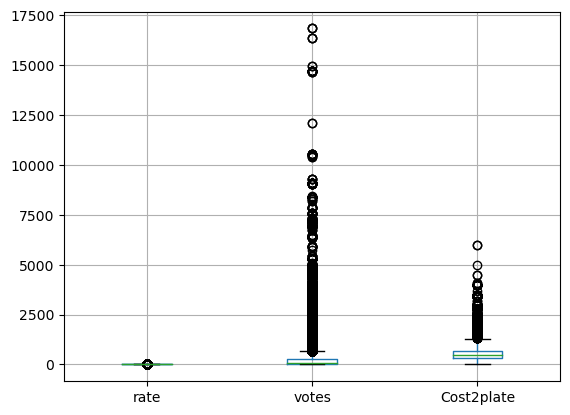

In [47]:
data.boxplot()

In [48]:
# in the votes column has null values then i need to remove those 
Q1 = df.votes.quantile(0.25)
Q3 = df.votes.quantile(0.75)
print(Q1, Q3)
IQR = Q3 - Q1
print(IQR)
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

7.0 198.0
191.0


(-279.5, 484.5)

In [49]:
data[(data.votes<lower_limit)|(data.votes>upper_limit)]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plate,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
7,Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Pizza, Cafe, Italian",600.0,Cafes
9,Smacznego,Yes,No,4.2,504,Banashankari,Cafe,"Cafe, Mexican, Italian, Momos, Beverages",550.0,Cafes
...,...,...,...,...,...,...,...,...,...,...
51699,Harry's Bar + Cafe,Yes,Yes,4.1,1218,Whitefield,Pub,"Asian, American, Mexican",1200.0,Pubs and bars
51700,BAR BAR,No,Yes,4.1,1003,Whitefield,"Bar, Casual Dining","Continental, North Indian, Italian",1500.0,Pubs and bars
51701,The Beer Cafe,Yes,Yes,4.1,673,Whitefield,Pub,"Finger Food, North Indian, Chinese, Italian",1400.0,Pubs and bars
51702,Pablo's Gastrobar,No,No,4.0,1094,Whitefield,Bar,"Finger Food, American, Asian, Italian",1450.0,Pubs and bars


In [50]:
data= data[(data.votes>lower_limit)&(data.votes<upper_limit)]

<Axes: >

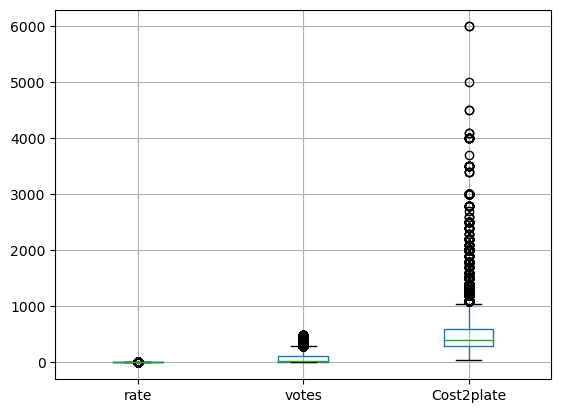

In [51]:
data.boxplot()

In [52]:
data[(data.Cost2plate>3010)].shape #these is extreme outlies in my cost2plate column's data i should remove that

(39, 10)

In [53]:
data=data[(data.Cost2plate<3010)]

<Axes: >

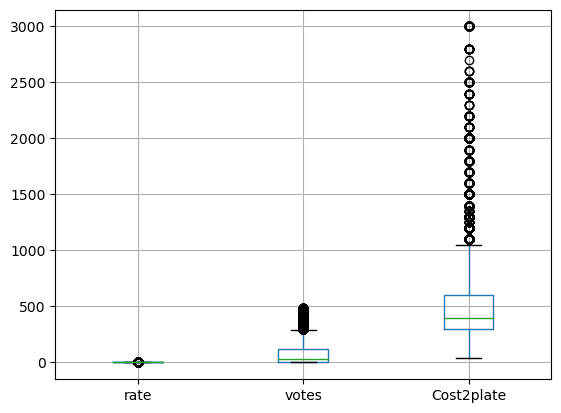

In [54]:
data.boxplot()

In [55]:
data[(data.Cost2plate>2800)].shape # i checked that above little outlier but that outlies contains 65 columns i shouldn't remove

(65, 10)

In [56]:
data["Cost2plate"] = data["Cost2plate"].fillna(data["Cost2plate"].mean())

In [57]:
data.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
Cost2plate      0
Type            0
dtype: int64

**these is no null values in my data**

## all the datatype is set now

In [58]:
data.info()
# all the datatype set

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28746 entries, 3 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          28746 non-null  object 
 1   online_order  28746 non-null  object 
 2   book_table    28746 non-null  object 
 3   rate          28746 non-null  float64
 4   votes         28746 non-null  int64  
 5   location      28746 non-null  object 
 6   rest_type     28746 non-null  object 
 7   cuisines      28746 non-null  object 
 8   Cost2plate    28746 non-null  float64
 9   Type          28746 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.4+ MB


In [59]:
data.head(2) #if u check above all datatype has been done and no null values 

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plate,Type
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [60]:
data.shape

(28746, 10)

# cleaning  and clustering the rest_type column



In [61]:
data['rest_type'].value_counts() # all those rest have less like 1,2 ,etc.
                                                #what i can do is i will make cluster to make 1 to 1000 as other

Quick Bites                   11824
Casual Dining                  5431
Cafe                           1896
Delivery                       1411
Dessert Parlor                 1364
                              ...  
Pop Up                            1
Quick Bites, Kiosk                1
Dessert Parlor, Food Court        1
Mess, Quick Bites                 1
Bakery, Sweet Shop                1
Name: rest_type, Length: 82, dtype: int64

In [62]:
rest_type=data['rest_type'].value_counts()  #i assigned data to rest_type variable
rest_type

Quick Bites                   11824
Casual Dining                  5431
Cafe                           1896
Delivery                       1411
Dessert Parlor                 1364
                              ...  
Pop Up                            1
Quick Bites, Kiosk                1
Dessert Parlor, Food Court        1
Mess, Quick Bites                 1
Bakery, Sweet Shop                1
Name: rest_type, Length: 82, dtype: int64

In [63]:
rest_type_lessthan1000=rest_type[rest_type<1000]  # filtered the data lessthan 1000 and assign
rest_type_lessthan1000

Bakery                        726
Beverage Shop                 486
Food Court                    420
Casual Dining, Bar            413
Bar                           345
                             ... 
Pop Up                          1
Quick Bites, Kiosk              1
Dessert Parlor, Food Court      1
Mess, Quick Bites               1
Bakery, Sweet Shop              1
Name: rest_type, Length: 76, dtype: int64

In [64]:
def handle_rest_type(value):                   # using function like whereever 1 to 1000 data is their then i shows 'Others'
    if(value in rest_type_lessthan1000):                                        # by using if statement
        return 'others'
    else:
        return value

In [65]:
data['rest_type']=data['rest_type'].apply(handle_rest_type) # same like assigned the data

In [66]:
data['rest_type'].value_counts()

Quick Bites           11824
others                 5614
Casual Dining          5431
Cafe                   1896
Delivery               1411
Dessert Parlor         1364
Takeaway, Delivery     1206
Name: rest_type, dtype: int64

In [67]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plate,Type
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,North Indian,600.0,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800.0,Buffet
8,Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,"Cafe, Italian, Continental",700.0,Cafes


# cleaning and clustering the location column



In [68]:
data['location'].value_counts() #i will make clustering like lessthan 300

BTM                     2324
Whitefield              1706
HSR                     1514
Marathahalli            1480
Indiranagar             1183
                        ... 
West Bangalore             4
Nagarbhavi                 4
Jakkur                     1
Rajarajeshwari Nagar       1
Peenya                     1
Name: location, Length: 93, dtype: int64

In [69]:
data['location'].value_counts().unique()

array([2324, 1706, 1514, 1480, 1183, 1161, 1129, 1042, 1032,  967,  870,
        805,  524,  521,  519,  502,  489,  461,  455,  443,  435,  430,
        426,  408,  390,  384,  371,  369,  359,  332,  309,  282,  243,
        221,  184,  180,  173,  169,  167,  164,  157,  155,  153,  147,
        137,  129,  128,  119,  112,  107,  103,  102,   99,   95,   84,
         79,   77,   73,   72,   68,   63,   56,   51,   49,   46,   44,
         40,   36,   34,   21,   19,   18,   17,   16,   14,   13,    9,
          5,    4,    1], dtype=int64)

In [70]:
#same like previous

location=data['location'].value_counts()
location
location_less300=location[location<300]

def handle_location(value):
    if(value in location_less300):
        return 'others'
    else:
        return value
    

In [71]:
data['location']=data['location'].apply(handle_location) # assigned
data['location'].value_counts()

others                   4976
BTM                      2324
Whitefield               1706
HSR                      1514
Marathahalli             1480
Indiranagar              1183
Electronic City          1161
JP Nagar                 1129
Bellandur                1042
Jayanagar                1032
Bannerghatta Road         967
Koramangala 5th Block     870
Sarjapur Road             805
Kalyan Nagar              524
Brigade Road              521
Brookefield               519
Banashankari              502
New BEL Road              489
Ulsoor                    461
Koramangala 1st Block     455
Malleshwaram              443
Frazer Town               435
Basavanagudi              430
Koramangala 7th Block     430
Banaswadi                 426
Rajajinagar               408
Koramangala 6th Block     390
Kammanahalli              384
Koramangala 4th Block     371
Old Airport Road          369
MG Road                   359
Richmond Road             332
Domlur                    309
Name: loca

In [72]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plate,Type
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,North Indian,600.0,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,others,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800.0,Buffet
8,Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,"Cafe, Italian, Continental",700.0,Cafes


# cleaning and clustering the cuisines column



In [73]:
data['cuisines'].value_counts()  #cluster just 1 to 100 values

North Indian                                       1683
North Indian, Chinese                              1494
South Indian                                       1111
Bakery, Desserts                                    576
Biryani                                             545
                                                   ... 
North Indian, Beverages, Juices                       1
South Indian, Chinese, Desserts, Beverages            1
South Indian, Fast Food, North Indian, Desserts       1
Chinese, Rolls, Biryani, Momos                        1
North Indian, Chinese, Arabian, Momos                 1
Name: cuisines, Length: 2341, dtype: int64

In [74]:
data['cuisines'].value_counts().unique()

array([1683, 1494, 1111,  576,  545,  482,  457,  424,  421,  383,  291,
        274,  256,  243,  233,  213,  203,  199,  195,  184,  179,  174,
        167,  164,  159,  156,  152,  149,  145,  130,  129,  127,  126,
        123,  116,  110,  109,  107,  106,  105,  100,   97,   95,   94,
         84,   82,   78,   76,   74,   70,   69,   68,   67,   65,   64,
         61,   60,   58,   57,   56,   55,   54,   53,   52,   51,   50,
         49,   48,   47,   46,   45,   44,   43,   42,   41,   39,   38,
         37,   36,   35,   34,   33,   32,   31,   30,   29,   28,   27,
         26,   25,   24,   23,   22,   21,   20,   19,   18,   17,   16,
         15,   14,   13,   12,   11,   10,    9,    8,    7,    6,    5,
          4,    3,    2,    1], dtype=int64)

In [75]:
# same as previous

cuisines=data['cuisines'].value_counts()
cuisines
cuisines_less150=cuisines[cuisines<150]

def handle_cuisines(value):
    if(value in cuisines_less150):
        return 'others'
    else:
        return value

In [76]:
data['cuisines']=data['cuisines'].apply(handle_cuisines) #assigned
data['cuisines'].value_counts()

others                                 17554
North Indian                            1683
North Indian, Chinese                   1494
South Indian                            1111
Bakery, Desserts                         576
Biryani                                  545
Fast Food                                482
South Indian, North Indian, Chinese      457
Desserts                                 424
Cafe                                     421
Bakery                                   383
Chinese                                  291
Ice Cream, Desserts                      274
Mithai, Street Food                      256
Chinese, North Indian                    243
North Indian, Chinese, Biryani           233
Desserts, Ice Cream                      213
South Indian, North Indian               203
North Indian, South Indian, Chinese      199
North Indian, South Indian               195
North Indian, Biryani                    184
Street Food                              179
Biryani, N

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28746 entries, 3 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          28746 non-null  object 
 1   online_order  28746 non-null  object 
 2   book_table    28746 non-null  object 
 3   rate          28746 non-null  float64
 4   votes         28746 non-null  int64  
 5   location      28746 non-null  object 
 6   rest_type     28746 non-null  object 
 7   cuisines      28746 non-null  object 
 8   Cost2plate    28746 non-null  float64
 9   Type          28746 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.4+ MB


In [78]:
data['Type'].value_counts()

Delivery              13949
Dine-out              10646
Desserts               2235
Cafes                   895
Drinks & nightlife      377
Buffet                  341
Pubs and bars           303
Name: Type, dtype: int64

# Data is Cleaned now, Lets go to to Visualization




In [79]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'Cost2plate', 'Type'],
      dtype='object')

## 4.1) Histograms

Histograms are one of the most common graphs used to display numeric data.
distribution of the data --- whether the data is normally distributed or if it's skewed (to the left or right)

In [80]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plate,Type
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,North Indian,600.0,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,others,Casual Dining,others,800.0,Buffet
8,Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,others,700.0,Cafes


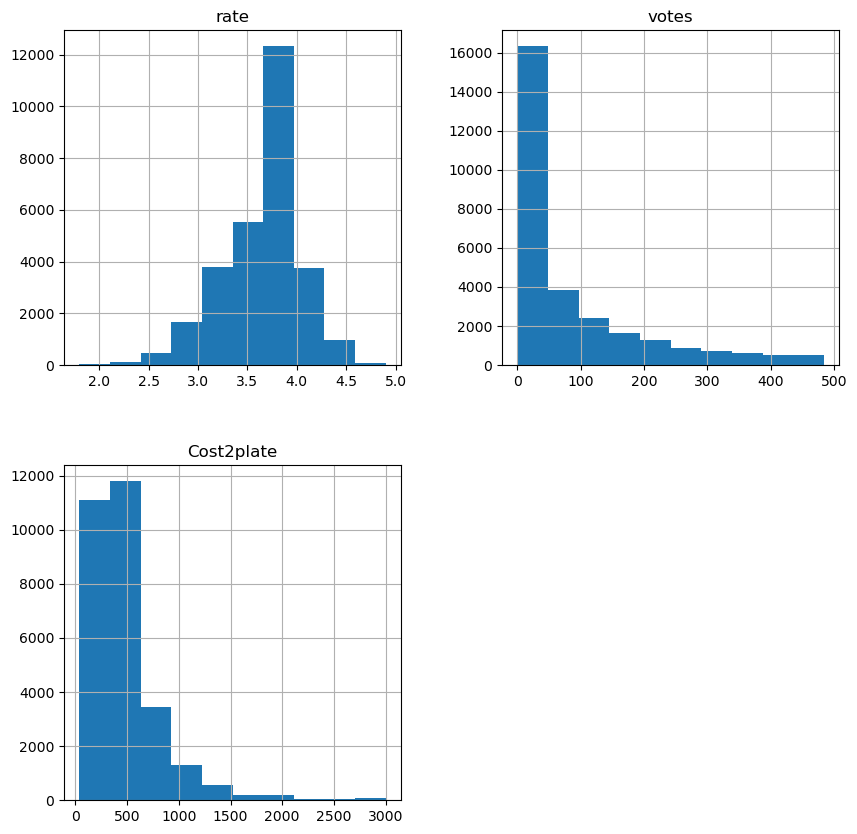

In [81]:
# Histogram of each feature
data.hist(bins=10,figsize=(10,10))    
plt.show()

# Count Plot of Various Locations

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Bannerghatta Road'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Electronic City'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Marathahalli'),
  Text(10, 0, 'Sarjapur Road'),
  Text(11, 0, 'Koramangala 5th Block'),
  Text(12, 0, 'Richmond Road'),
  Text(13, 0, 'Koramangala 7th Block'),
  Text(14, 0, 'Koramangala 4th Block'),
  Text(15, 0, 'Bellandur'),
  Text(16, 0, 'Whitefield'),
  Text(17, 0, 'Old Airport Road'),
  Text(18, 0, 'Indiranagar'),
  Text(19, 0, 'Koramangala 1st Block'),
  Text(20, 0, 'Frazer Town'),
  Text(21, 0, 'Brigade Road'),
  Text(22, 0, 'Ulsoor'),
  Text(23, 0, 'MG Road'),
  Text(24, 0, 'Domlur'),
  Text(25, 0, 'Malleshwaram'),
  Text(26, 0, 'Kammanahalli'),
  Text(27, 0, 'Koramangala 6

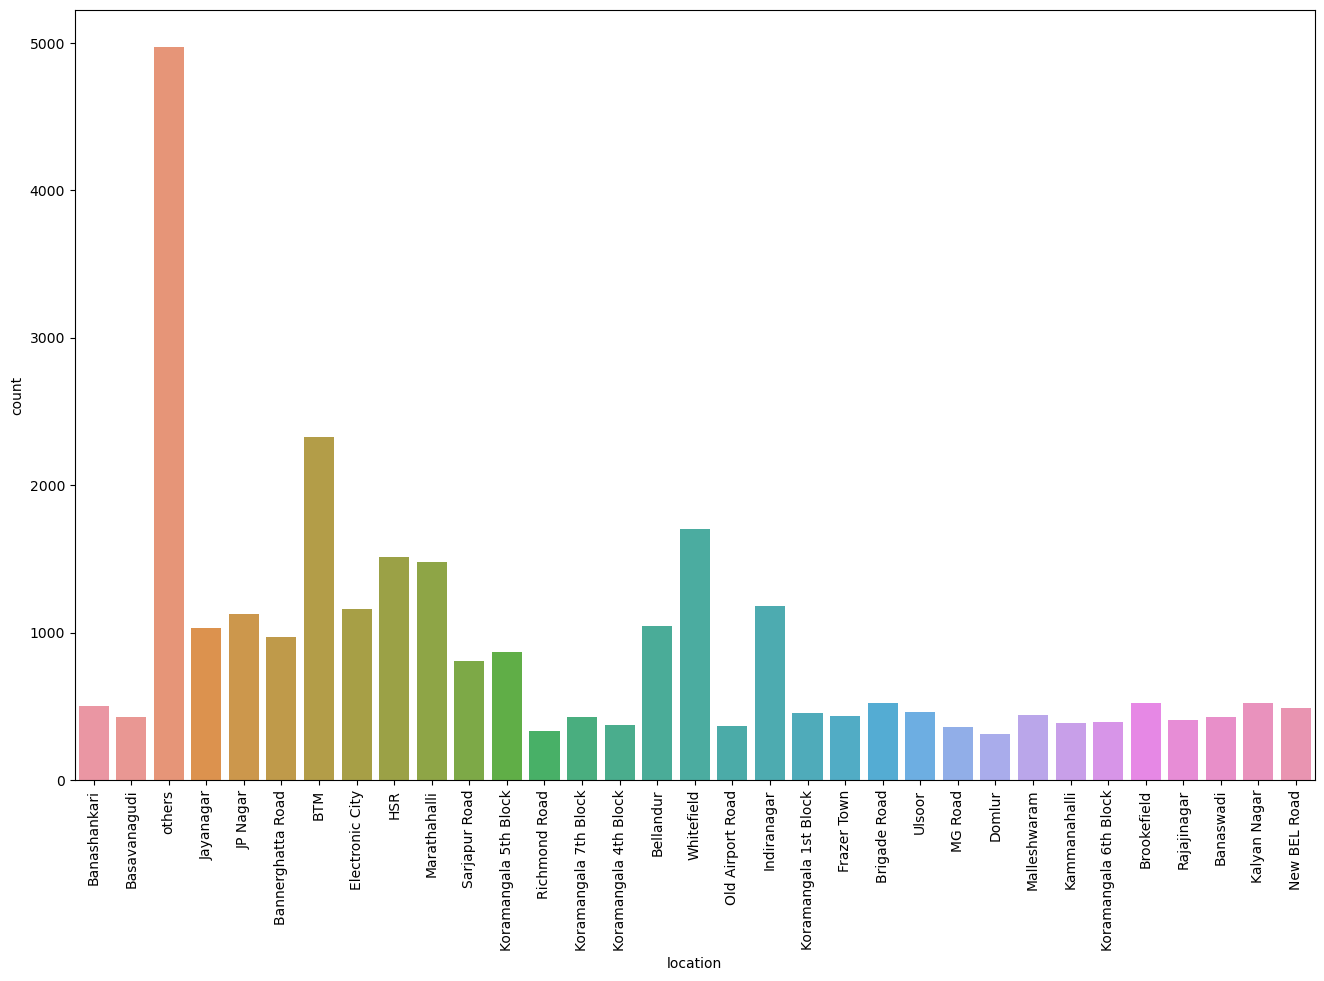

In [82]:
plt.figure(figsize = (16,10))
ax = sns.countplot(data=data,x='location')
plt.xticks(rotation=90)

i found in the location of BTM has high count of Restaurants and lowest is Domlur.

# Visualizing Online Order

<Axes: xlabel='online_order', ylabel='count'>

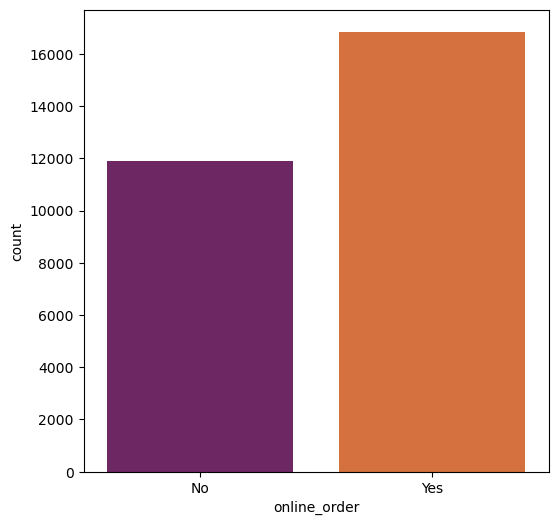

In [83]:
plt.figure(figsize = (6,6))
sns.countplot(data=data,x='online_order', palette = 'inferno')

I found in the column of Online_order Yes is high no is low counts

# Visualizing book_table



<Axes: xlabel='book_table', ylabel='count'>

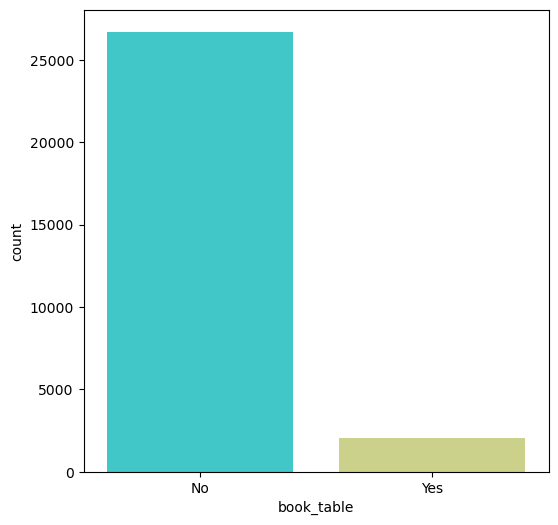

In [84]:
plt.figure(figsize = (6,6))
sns.countplot(data=data,x='book_table', palette = 'rainbow')

I found in the column of Online_order No is high Yes is low counts

# Visualizing Online Order vs Rate


<Axes: xlabel='online_order', ylabel='rate'>

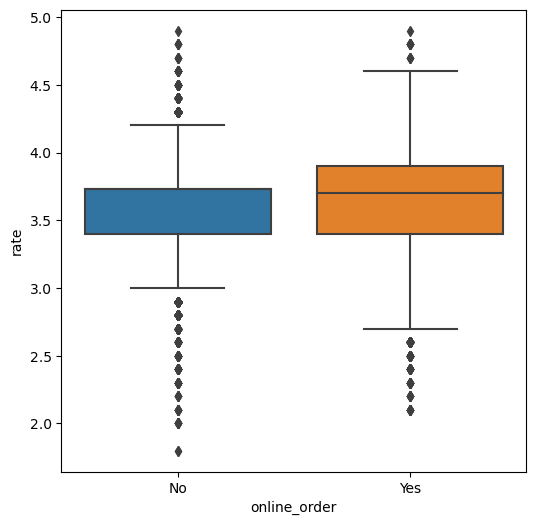

In [85]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate',data = data,orient='v')

# Visualizing Book Table vs Rate



<Axes: xlabel='book_table', ylabel='rate'>

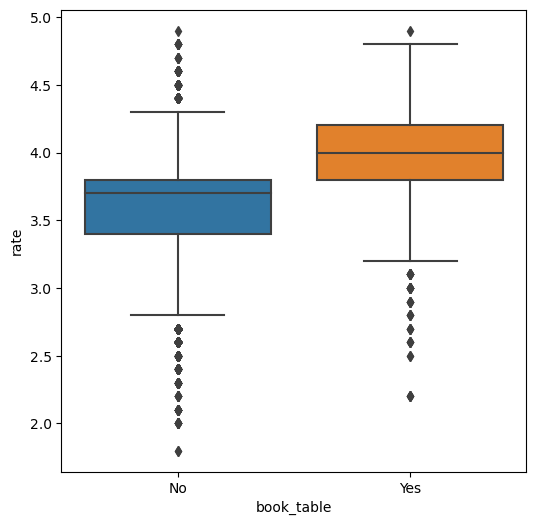

In [86]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'book_table', y = 'rate', data = data)

# Visualizing Online Order Facility, Location Wise



In [87]:
df1 = data.groupby(['location','online_order'])['name'].count() # i am going to grouping my data location wise and i 
                                                                              #going to create new csv formate.
    
#to_csv() function converts DataFrame into CSV data. We can pass a file object to write the CSV data into a file.
                                     #Otherwise, the CSV data is returned in the string format.       
df1.to_csv('location_online.csv')
df1 = pd.read_csv('location_online.csv')
df1 = pd.pivot_table(df1, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)
df1

name      
online_order             No   Yes
location                         
BTM                     782  1542
Banashankari            246   256
Banaswadi               213   213
Bannerghatta Road       392   575
Basavanagudi            176   254
Bellandur               434   608
Brigade Road            209   312
Brookefield             188   331
Domlur                  163   146
Electronic City         649   512
Frazer Town             200   235
HSR                     400  1114
Indiranagar             435   748
JP Nagar                472   657
Jayanagar               329   703
Kalyan Nagar            216   308
Kammanahalli            173   211
Koramangala 1st Block   126   329
Koramangala 4th Block   173   198
Koramangala 5th Block   256   614
Koramangala 6th Block   150   240
Koramangala 7th Block   160   270
MG Road                 198   161
Malleshwaram            175   268
Marathahalli            586   894
New BEL Road            220   269
Old Airport Road        187   182
Rajajinagar             185   223
Richmond Road           208   124
Sarjapur Road           255   550
Ulsoor                  181   280
Whitefield              823   883
others                 2333  2643

<Axes: xlabel='location'>

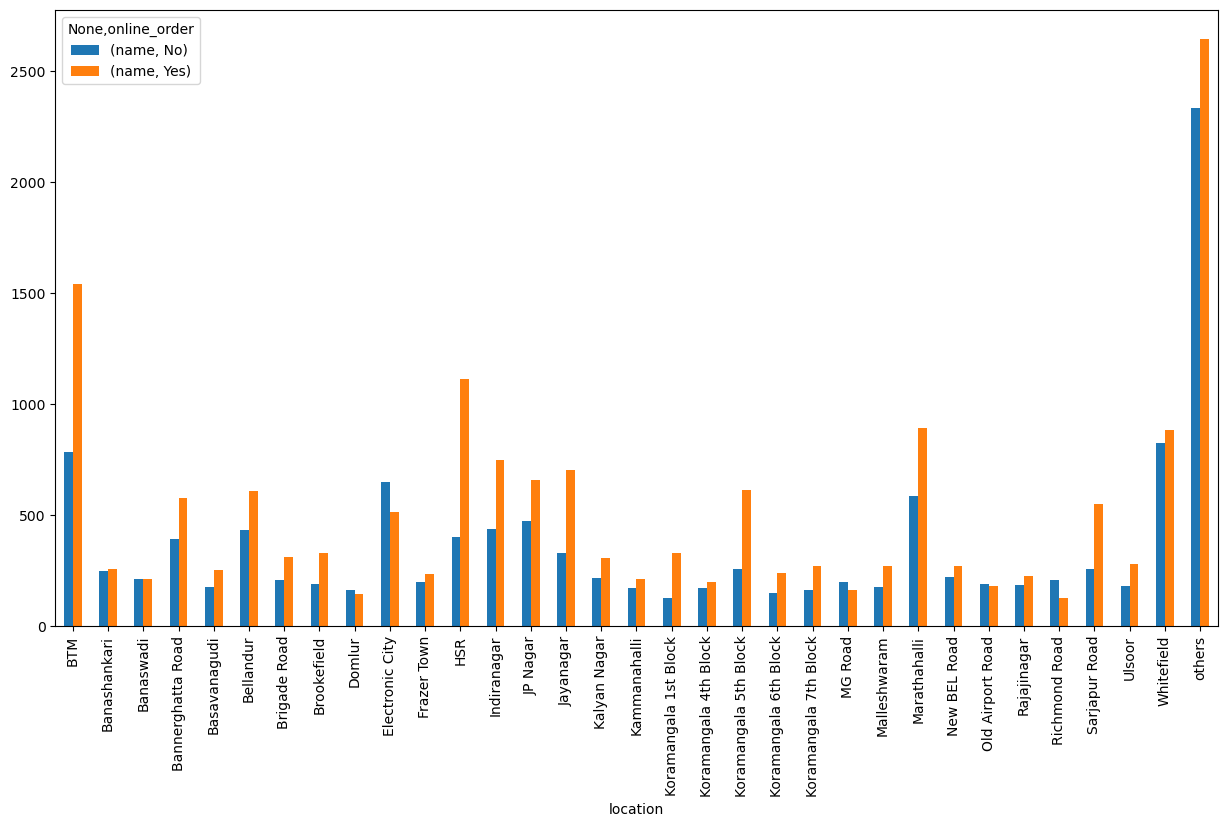

In [88]:
df1.plot(kind = 'bar', figsize = (15,8))

i found in the location of Btm online orders are high and Domlur is low

# Visualizing Book Table Facility, Location Wise



In [89]:
df2 = data.groupby(['location','book_table'])['name'].count()
df2.to_csv('location_booktable.csv')
df2 = pd.read_csv('location_booktable.csv')
df2 = pd.pivot_table(df2, values=None, index=['location'], columns=['book_table'], fill_value=0, aggfunc=np.sum)
df2

name     
book_table               No  Yes
location                        
BTM                    2282   42
Banashankari            481   21
Banaswadi               423    3
Bannerghatta Road       951   16
Basavanagudi            422    8
Bellandur               990   52
Brigade Road            451   70
Brookefield             483   36
Domlur                  288   21
Electronic City        1096   65
Frazer Town             434    1
HSR                    1441   73
Indiranagar            1041  142
JP Nagar               1065   64
Jayanagar               927  105
Kalyan Nagar            457   67
Kammanahalli            369   15
Koramangala 1st Block   455    0
Koramangala 4th Block   282   89
Koramangala 5th Block   713  157
Koramangala 6th Block   382    8
Koramangala 7th Block   386   44
MG Road                 243  116
Malleshwaram            419   24
Marathahalli           1424   56
New BEL Road            475   14
Old Airport Road        333   36
Rajajinagar             397   11
Richmond Road           292   40
Sarjapur Road           747   58
Ulsoor                  393   68
Whitefield             1607   99
others                 4566  410

<Axes: xlabel='location'>

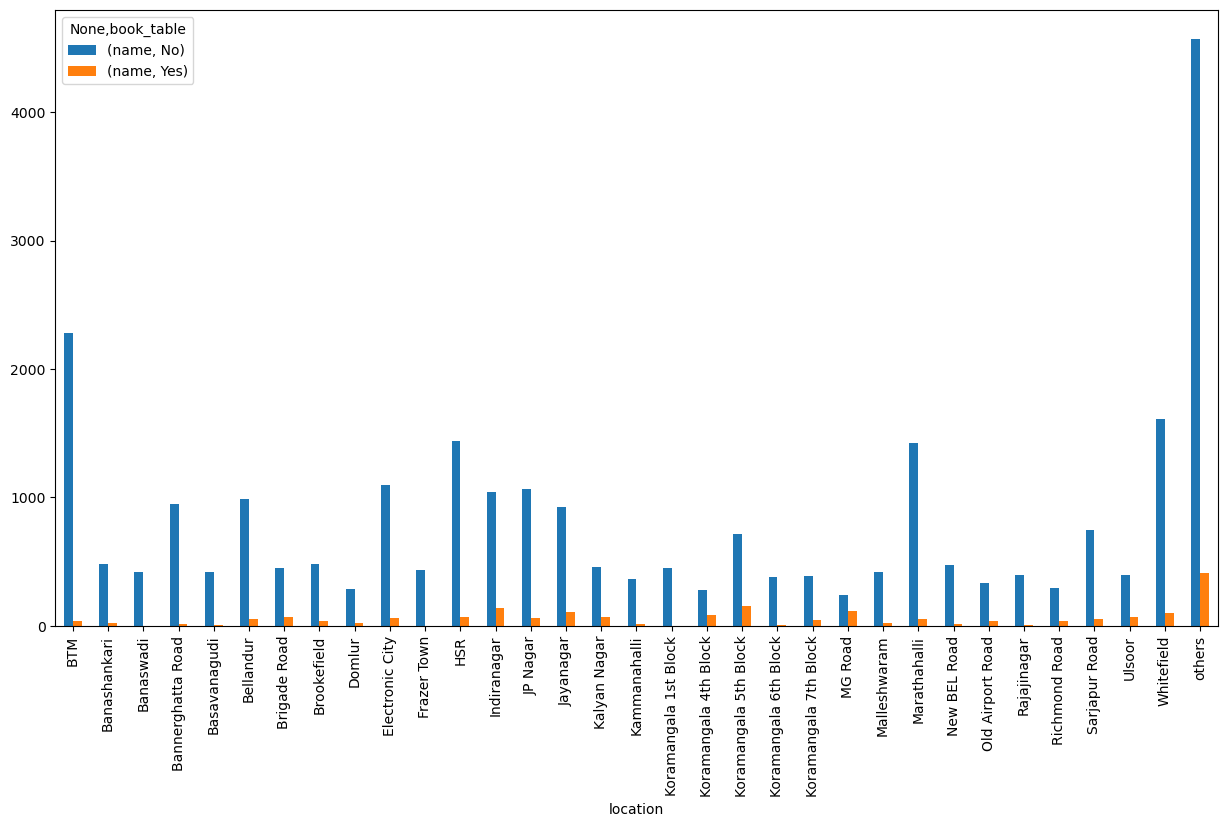

In [90]:
df2.plot(kind = 'bar', figsize = (15,8))

i found in the location Koramangala 5th block Table Bookings are high and BTM is the lowest table bokking are high.

# Visualizing Types of Restaurents vs Rate



<Axes: xlabel='Type', ylabel='rate'>

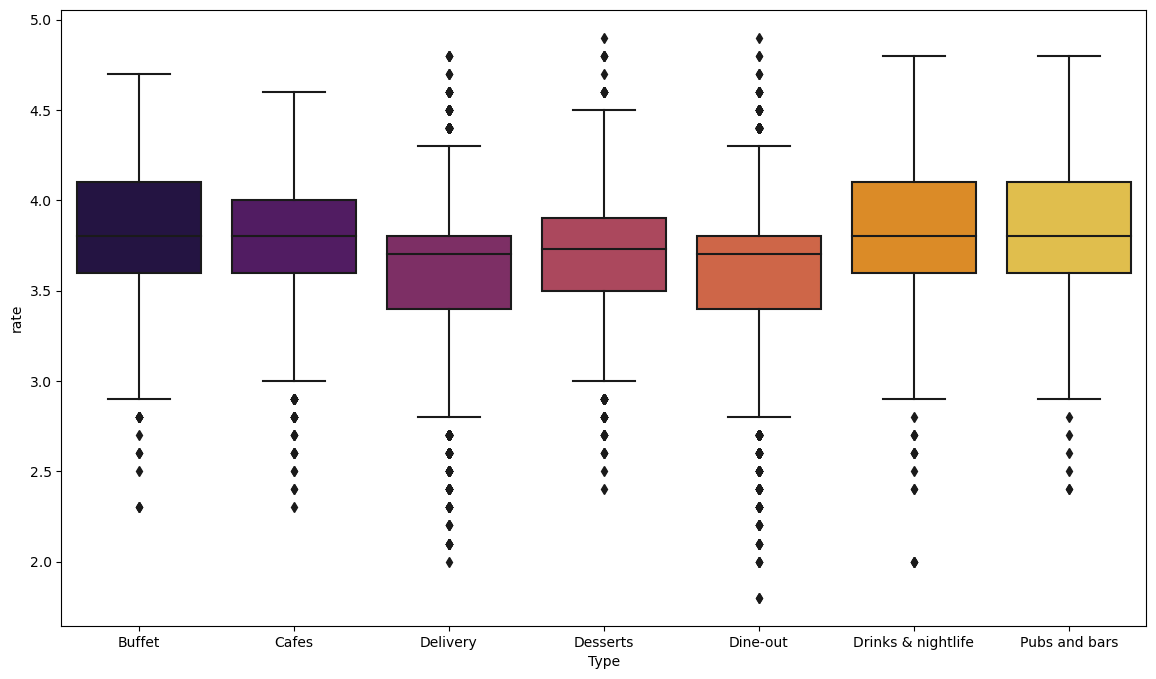

In [91]:
plt.figure(figsize = (14, 8))
sns.boxplot(x = 'Type', y = 'rate', data = data, palette = 'inferno',orient='v')

i found that Pubs and bars rating is high.

# Grouping Types of Restaurents, location wise



In [92]:
df3 = data.groupby(['location','Type'])['name'].count()
df3.to_csv('location_Type.csv')
df3 = pd.read_csv('location_Type.csv')
df3 = pd.pivot_table(df3, values=None, index=['location'], columns=['Type'], fill_value=0, aggfunc=np.sum)
df3

name                                   \
Type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                        9    38     1329      107      821   
Banashankari               1    21      212       43      220   
Banaswadi                  0    13      157       19      232   
Bannerghatta Road          2    27      471       91      375   
Basavanagudi               4     6      183       44      190   
Bellandur                 22    34      482       66      421   
Brigade Road              11    21      204       48      209   
Brookefield                0    10      269       37      201   
Domlur                    11     8      154       22      101   
Electronic City           17    23      529       70      486   
Frazer Town                0    10      244       46      133   
HSR                        7    31      944      105      416   
Indiranagar                7    66      622      105      343   
JP Nagar                  13    30      537      100      441   
Jayanagar                  8    36      471      107      403   
Kalyan Nagar               5    21      176       44      271   
Kammanahalli               1    10      148       17      205   
Koramangala 1st Block      0     7      285       26      130   
Koramangala 4th Block      4    28      179       31       92   
Koramangala 5th Block      4    56      396      108      267   
Koramangala 6th Block      4    20      202       32      115   
Koramangala 7th Block      9    24      178       57      147   
MG Road                   14    35       95       32      139   
Malleshwaram               0    22      169       63      179   
Marathahalli              16    29      808       90      529   
New BEL Road               2    18      239       31      193   
Old Airport Road           8     5      163       34      142   
Rajajinagar                3     4      181       42      173   
Richmond Road             32    13       97       37      137   
Sarjapur Road              7    14      433       75      264   
Ulsoor                     9    27      189       35      183   
Whitefield                22    37      848      118      640   
others                    89   151     2355      353     1848   

                                                        
Type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                    9            11  
Banashankari                           5             0  
Banaswadi                              4             1  
Bannerghatta Road                      1             0  
Basavanagudi                           3             0  
Bellandur                              9             8  
Brigade Road                          20             8  
Brookefield                            2             0  
Domlur                                 4             9  
Electronic City                       18            18  
Frazer Town                            1             1  
HSR                                    5             6  
Indiranagar                           17            23  
JP Nagar                               6             2  
Jayanagar                              7             0  
Kalyan Nagar                           7             0  
Kammanahalli                           3             0  
Koramangala 1st Block                  1             6  
Koramangala 4th Block                 22            15  
Koramangala 5th Block                 17            22  
Koramangala 6th Block                  8             9  
Koramangala 7th Block                  2            13  
MG Road                               23            21  
Malleshwaram                           6             4  
Marathahalli                           8             0  
New BEL Road                           3             3  
Old Airport Road              

<Axes: xlabel='location'>

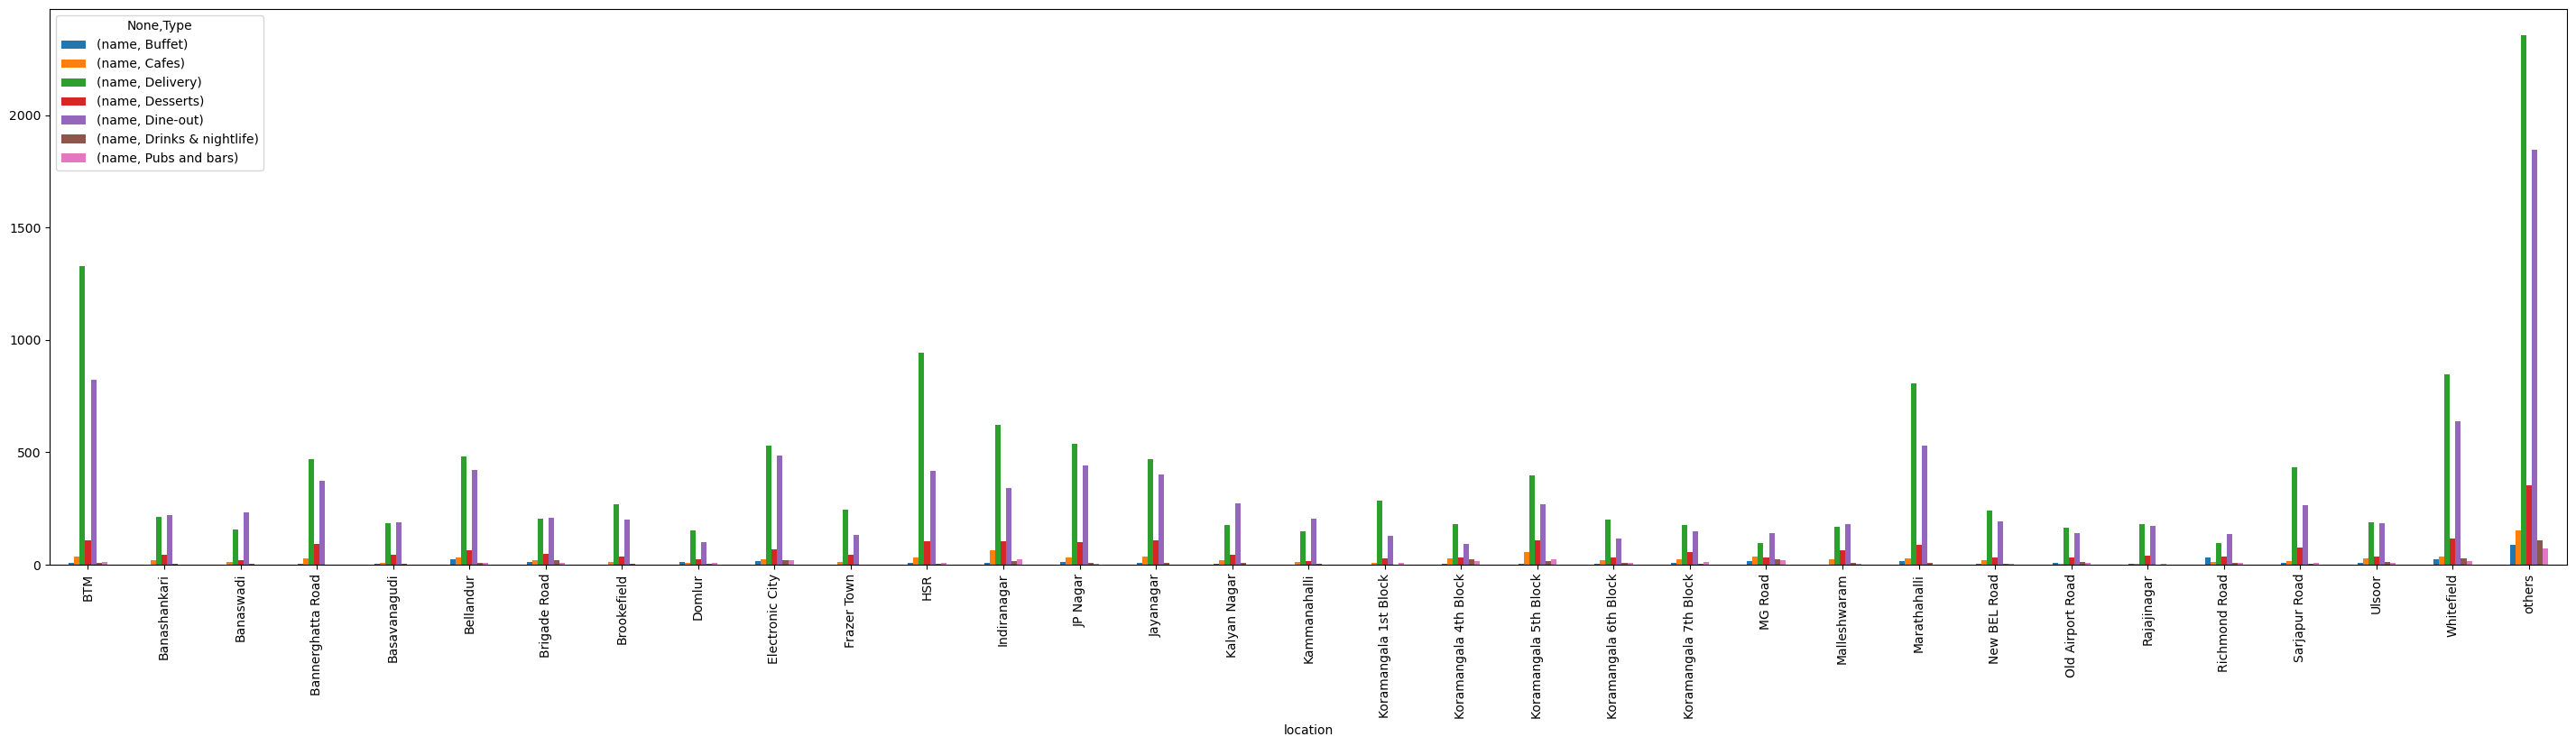

In [93]:
df3.plot(kind = 'bar', figsize = (36,8))

i found location of BTM many delivery and Dine_out are hight.

# No. of Votes, Location Wise



In [94]:
df4 = df[['location', 'votes']]
df4.drop_duplicates()
df5 = df4.groupby(['location'])['votes'].sum()
df5 = df5.to_frame()
df5 = df5.sort_values('votes', ascending=False)
df5.head()

,votes
location,
Koramangala 5th Block,2219506
Indiranagar,1196007
Koramangala 4th Block,685156
BTM,619376
Church Street,594979


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92]),
 [Text(0, 0, 'Koramangala 5th Block'),
  Text(1, 0, 'Indiranagar'),
  Text(2, 0, 'Koramangala 4th Block'),
  Text(3, 0, 'BTM'),
  Text(4, 0, 'Church Street'),
  Text(5, 0, 'JP Nagar'),
  Text(6, 0, 'Lavelle Road'),
  Text(7, 0, 'HSR'),
  Text(8, 0, 'Koramangala 7th Block'),
  Text(9, 0, 'Jayanagar'),
  Text(10, 0, 'Whitefield'),
  Text(11, 0, 'Koramangala 6th Block'),
  Text(12, 0, 'Marathahalli'),
  Text(13, 0, 'MG Road'),
  Text(14, 0, 'Brigade Road'),
  Text(15, 0, 'Sarjapur Road'),
  Text(16, 0, 'Residency Road'),
  Text(17, 0, 'Cunningham Road'),
  Text(18, 0, 'St. M

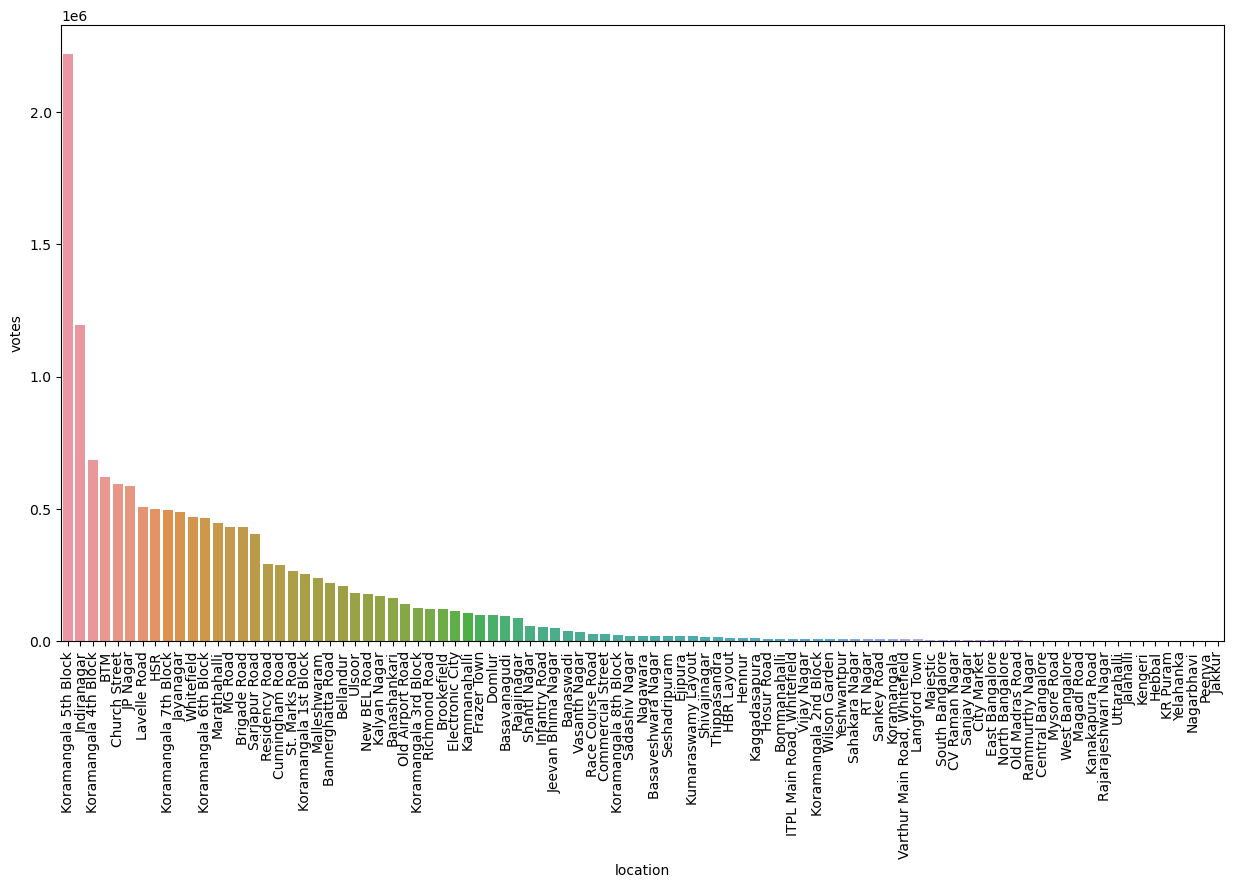

In [95]:
plt.figure(figsize = (15,8))
sns.barplot(data=df5, x = df5.index, y='votes')
plt.xticks(rotation = 90)

I found the Koramangala 5th block votes are high.

# Visualizing Top Cuisines



In [96]:
df6 = df[['cuisines', 'votes']]
df6.drop_duplicates()
df7 = df6.groupby(['cuisines'])['votes'].sum()
df7 = df7.to_frame()
df7 = df7.sort_values('votes', ascending=False)
df7.head()

,votes
cuisines,
North Indian,558654
"Pizza, Cafe, Italian",347520
"Cafe, American, Burger, Steak",301059
"North Indian, Chinese",259864
"North Indian, Mughlai, South Indian, Chinese",227930


In [97]:
df7 = df7.iloc[1:, :]
df7.head()

,votes
cuisines,
"Pizza, Cafe, Italian",347520
"Cafe, American, Burger, Steak",301059
"North Indian, Chinese",259864
"North Indian, Mughlai, South Indian, Chinese",227930
South Indian,161991


**1)I found in the location of BTM has high count of Restaurants and lowest is Domlur.**

**2)I found in the column of Online_order Yes is high no is low counts.**

**3)I found in the location of Btm online orders are high and Domlur is low.**

**4)I found in the location Koramangala 5th block Table Bookings are high and BTM is the lowest table bokking are high.**

**5)I found that Pubs and bars rating is high.**

**6)I found location of BTM many delivery and Dine_out are hight.**

**7)I found the Koramangala 5th block votes are high.**

# visualixzation has been completed now shift to Simple Linear Regression



In [99]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plate,Type
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,North Indian,600.0,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,others,Casual Dining,others,800.0,Buffet
8,Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,others,700.0,Cafes


In [100]:
print('rest_type',data.rest_type.nunique())
print('type',data.Type.nunique())
print('cuisines',data.cuisines.nunique())
print('location',data.location.nunique())

rest_type 7
type 7
cuisines 29
location 33


In [101]:
print('rest_type---------->',data.rest_type.unique())
print('type---------->','\n',data.Type.unique())
print('cuisines---------->','\n',data.cuisines.unique())
print('location---------->','\n',data.location.unique())

rest_type----------> ['Quick Bites' 'Casual Dining' 'Cafe' 'others' 'Delivery' 'Dessert Parlor'
 'Takeaway, Delivery']
type----------> 
 ['Buffet' 'Cafes' 'Delivery' 'Desserts' 'Dine-out' 'Drinks & nightlife'
 'Pubs and bars']
cuisines----------> 
 ['South Indian, North Indian' 'others' 'North Indian' 'Cafe'
 'Cafe, Fast Food' 'Bakery, Desserts' 'Biryani' 'South Indian'
 'North Indian, Chinese' 'Ice Cream, Desserts' 'Desserts, Beverages'
 'Chinese' 'Bakery' 'Fast Food' 'Mithai, Street Food' 'Desserts'
 'South Indian, North Indian, Chinese' 'Beverages' 'Chinese, North Indian'
 'Street Food' 'North Indian, Chinese, Biryani' 'Beverages, Fast Food'
 'Desserts, Ice Cream' 'North Indian, South Indian'
 'North Indian, Biryani' 'Biryani, Kebab'
 'North Indian, South Indian, Chinese' 'Biryani, North Indian'
 'Finger Food']
location----------> 
 ['Banashankari' 'Basavanagudi' 'others' 'Jayanagar' 'JP Nagar'
 'Bannerghatta Road' 'BTM' 'Electronic City' 'HSR' 'Marathahalli'
 'Sarjapur Road' 'Koram

Label Encoding (Ordinal Encoding)     ---  
OHE (Nominal Encoding)                ---

In [102]:
# Now will perform encoding to convert categorical data in to numbers

data.replace({'Casual Dining':0,'others':1,'Quick Bites':2,'Cafe':3,'Delivery':4,'Dessert Parlor':5,'Takeaway, Delivery':6,'Delivery':7},inplace=True)

In [103]:
data.replace({'Buffet':0,'Cafes':1,'Desserts':2,'Dine-out':3,'Drinks & nightlife':4,'Pubs and bars':5},inplace=True)

In [104]:
data.replace({'Banashankari':0,'Basavanagudi':6,'Jayanagar':2,'JP Nagar':3,'Bannerghatta Road':4,'BTM':5,'Electronic City':7, 'HSR':8, 'Marathahalli':9,
              'Koramangala 5th Block':10, 'Richmond Road':11, 'Koramangala 7th Block':12,'Koramangala 4th Block':13, 'Bellandur':14, 'Sarjapur Road':15,
              'Whitefield':16, 'Old Airport Road':17, 'Indiranagar':18, 'Koramangala 1st Block':19, 'Frazer Town':20,'MG Road':21 ,'Brigade Road':22,
              'Lavelle Road':23, 'Church Street':24, 'Ulsoor':25,'Residency Road':26, 'Domlur':27, 'Malleshwaram':28, 'Kammanahalli':29,
              'Koramangala 6th Block':30, 'Brookefield':31, 'Rajajinagar':32, 'Banaswadi':33,'Kalyan Nagar':34 ,'New BEL Road':35},inplace=True)

In [105]:
data.replace({'South Indian, North Indian':0,'North Indian':6,'North Indian':36,'Cafe, Continental':37,'Cafe, Fast Food':4,'Bakery, Desserts':5,'Pizza':7, 'Biryani':8, 'North Indian, Chinese, Fast Food':9,
              'South Indian':10, 'Burger, Fast Food':11, 'North Indian, Chinese':12,'Chinese, Thai':13, 'Pizza, Fast Food':14, 'Desserts, Beverages':15,
              'Biryani, Fast Food':16, 'Ice Cream, Desserts':17, 'Chinese':18, 'Bakery':19, 'Fast Food':20,'Desserts, Beverages':21 ,'Mithai, Street Food':22,
              'Chinese, North Indian':23, 'Beverages':24, 'South Indian, Biryani':25,'South Indian, North Indian, Chinese':26, 'South Indian, Chinese':27, 'Biryani, North Indian, Chinese':28, 'Ice Cream':29,
              'South Indian, North Indian, Chinese, Street Food':30, 'Andhra':31, 'Street Food':32, 'North Indian, Chinese, Biryani':33,'Desserts, Ice Cream':34 ,'Arabian':35},inplace=True)

In [106]:
data.replace({'Fast Food, Rolls':38,'Beverages, Fast Food':39,'North Indian, Chinese, South Indian':40,'North Indian, Fast Food':41,
              'North Indian, South Indian':42,'North Indian, Biryani':43,'Finger Food':44, 'Biryani, Kebab':45, 'North Indian, South Indian, Chinese':46,
                 'Biryani, North Indian':50},inplace=True)

In [107]:
print('rest_type---------->',data.online_order.unique())
print('type---------->','\n',data.book_table.unique())

rest_type----------> ['No' 'Yes']
type----------> 
 ['No' 'Yes']


In [108]:
data.replace({'Yes':0,'No':1},inplace=True)

In [109]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plate,Type
3,Addhuri Udupi Bhojana,1,1,3.7,88,0,2,0,300.0,0
4,Grand Village,1,1,3.8,166,6,0,1,600.0,0
5,Timepass Dinner,0,1,3.8,286,6,0,36,600.0,0
6,Rosewood International Hotel - Bar & Restaurant,1,1,3.6,8,1,0,1,800.0,0
8,Penthouse Cafe,0,1,4.0,324,0,3,1,700.0,1


In [110]:
print('rest_type---------->',data.rest_type.unique())
print('type---------->','\n',data.Type.unique())
print('cuisines---------->','\n',data.cuisines.unique())
print('location---------->','\n',data.location.unique())
print('rest_type---------->',data.online_order.unique())
print('type---------->','\n',data.book_table.unique())

rest_type----------> [2 0 3 1 7 5 6]
type----------> 
 [0 1 7 2 3 4 5]
cuisines----------> 
 [ 0  1 36  3  4  5  8 10 12 17 21 18 19 20 22  2 26 24 23 32 33 39 34 42
 43 45 46 50 44]
location----------> 
 [ 0  6  1  2  3  4  5  7  8  9 15 10 11 12 13 14 16 17 18 19 20 22 25 21
 27 28 29 30 31 32 33 34 35]
rest_type----------> [1 0]
type----------> 
 [1 0]


In [111]:
data.drop(['name'],axis=1,inplace=True) #axis=1 is drop column axis=0 drop row
data.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plate,Type
3,1,1,3.7,88,0,2,0,300.0,0
4,1,1,3.8,166,6,0,1,600.0,0
5,0,1,3.8,286,6,0,36,600.0,0
6,1,1,3.6,8,1,0,1,800.0,0
8,0,1,4.0,324,0,3,1,700.0,1


## Now i will be backuping the data

In [112]:
data_backup = data.copy(deep=True)

# Split the dataframe into x & y

In [113]:
# Separate object for target feature 
y= data['rate']

# Separate object for Predictors 
X = data.drop('rate',axis=1)

In [114]:
X.head(3)

,online_order,book_table,votes,location,rest_type,cuisines,Cost2plate,Type
3,1,1,88,0,2,0,300.0,0
4,1,1,166,6,0,1,600.0,0
5,0,1,286,6,0,36,600.0,0


In [115]:
y.head(2)

3    3.7
4    3.8
Name: rate, dtype: float64

In [116]:
print(f'Independent Features shape = {X.shape}, Dependent Features Shape = {y.shape}')

Independent Features shape = (28746, 8), Dependent Features Shape = (28746,)


# Splitting the data into Training data and Test data

In [117]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 14)
      # test size is 80% data is training and 20% data is testing
    #Random state ensures that the splits that you generate are reproducible.
                              #this ensures that the random numbers are generated in the same order.

In [118]:
print(X.shape, X_train.shape,X_test.shape)

(28746, 8) (22996, 8) (5750, 8)


In [119]:
print(y.shape,y_train.shape,y_test.shape)

(28746,) (22996,) (5750,)


# Build the Linear Regression Algorithm

In [120]:
from sklearn.linear_model import LinearRegression # import linearRegression model
lr = LinearRegression()
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [121]:
# Model Evaluation

from sklearn.metrics import mean_squared_error, r2_score

In [122]:
mse_train = mean_squared_error(y_train,y_train_pred)

In [123]:
mse_test = mean_squared_error(y_test,y_test_pred)

In [124]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

In [125]:
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)

rmse_train =  0.34301850051262434
rmse_test =  0.34676544100856


In [126]:
r2_score(y_train,y_train_pred)*100

16.118180171038045

In [127]:
r2_score(y_test,y_test_pred)*100

16.225442958224257

**Linear regrestion is completed I have found that the accuracy of train data is 16.12 and test data is 16.22**

# DecisionTree Algorithm

In [128]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [129]:
DM = DecisionTreeRegressor()
DM.fit(X_train,y_train)
y_train_pred = DM.predict(X_train)
y_test_pred = DM.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score*100)
print('test_score = ',test_score*100)

rmse_train =  0.030660113922493713
rmse_test =  0.22572349735944655
train_score =  99.32983725056634
test_score =  64.50280274387744


 # hyperparameters

In [130]:
# Number of trees in random Forest
criterion = ["squared_error", "friedman_mse", "absolute_error","poisson"]
# Number of features to consider at every split
max_features = ["auto", "sqrt", "log2"]
# The depth of the tree max_depth
max_depth = [i for i in range(5,50,6)]
# Min samples required to split the node
min_sample_split = [2,5,10,15,50]
# Min no of samples required to each leaf to split  ---- Pruning
min_samples_leaf = [1,2,5,10]

In [131]:
decetion_grid = {'criterion':criterion,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_sample_split,
              'min_samples_leaf':min_samples_leaf}

In [132]:
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomizedSearchCV( DM ,param_distributions = decetion_grid,cv=4,random_state = 0)

In [133]:
rf_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [5, 11, 17, 23, 29, 35, 41,
                                                      47],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              50]},
                   random_state=0)

In [134]:
rf_model.best_params_

{'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 35,
 'criterion': 'poisson'}

In [135]:
DM = DecisionTreeRegressor(criterion='friedman_mse',min_samples_split= 2,min_samples_leaf= 2,max_features= 'auto',max_depth= 35)
DM.fit(X_train,y_train)
y_train_pred = DM.predict(X_train)
y_test_pred = DM.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score*100)
print('test_score = ',test_score*100)

rmse_train =  0.09026955816199184
rmse_test =  0.22556676305289372
train_score =  94.19081256597896
test_score =  64.55208159228643


# Feature Selection Technique 

In [136]:
# let me import Extra tree regressor

from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [137]:
print(selection.feature_importances_)

[0.02731164 0.05551713 0.38220763 0.19231658 0.07273543 0.08832091
 0.16296563 0.01862504]


In [138]:
# let me plot feature importances 

feat_importances  =  pd.Series(selection.feature_importances_,index = X.columns)

<Axes: >

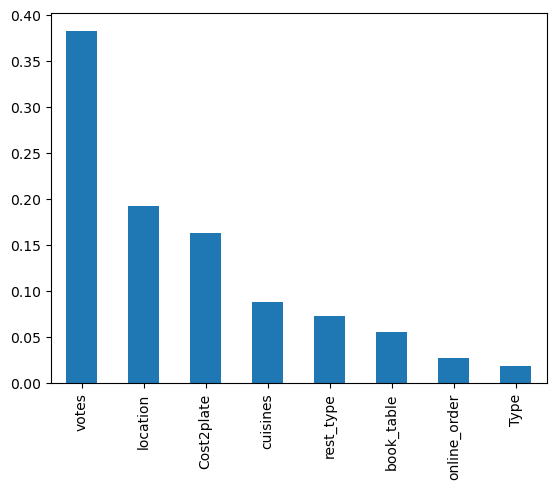

In [139]:
feat_importances.sort_values(ascending=False).plot(kind='bar')

In [140]:
X_imp = X[feat_importances.nlargest(6).index]
X_imp

,votes,location,Cost2plate,cuisines,rest_type,book_table
3,88,0,300.0,0,2,1
4,166,6,600.0,1,0,1
5,286,6,600.0,36,0,1
6,8,1,800.0,1,0,1
8,324,0,700.0,1,3,1
...,...,...,...,...,...,...
51712,27,16,1500.0,1,1,1
51713,0,16,600.0,44,1,1
51714,0,16,2000.0,44,1,1
51715,236,1,2500.0,44,1,0


In [141]:
X_train,X_test,y_train,y_test = train_test_split(X_imp,y,test_size =0.2,random_state = 14)

In [142]:
DM = DecisionTreeRegressor()
DM.fit(X_train,y_train)
y_train_pred = DM.predict(X_train)
y_test_pred = DM.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score*100)
print('test_score = ',test_score*100)

rmse_train =  0.040533985579063236
rmse_test =  0.19821638506730035
train_score =  98.82869128919289
test_score =  72.62717469482911


After the decision tree, I get accuracy for Train and test (99.41 and 79.13), however,

I need to find the hyperparameters accuracy for training and testing ( 94.18 and 64.31), then

I wanted to do Feature Selection Technique accuracy for Train and test ( 98.83 and 73.12).

For three techniques, I want to take the feature technique because it gives me the best accuracy for my data without overfiting.

# Random Forest Algorithm

In [143]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 14)

In [144]:
from sklearn.ensemble import RandomForestRegressor

In [145]:
RF = RandomForestRegressor()
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score*100)
print('test_score = ',test_score*100)

rmse_train =  0.0710353581973795
rmse_test =  0.17546016009251147
train_score =  96.40265653378637
test_score =  78.55146838987633


#  hyperparameters

In [146]:
# Number of trees in random Forest
n_estimators = [i for i in range(100,500,100)]
# Number of features to consider at every split
max_features = ["sqrt", "log2"]
# The depth of the tree max_depth
max_depth = [i for i in range(5,50,6)]
# Min samples required to split the node
min_sample_split = [2,5,10,15,50]
# Min no of samples required to each leaf to split  ---- Pruning
min_samples_leaf = [1,2,5,10]

In [147]:
# creating the random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_sample_split,
              'min_samples_leaf':min_samples_leaf}

In [148]:
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomizedSearchCV(estimator = RF,param_distributions = random_grid,cv=4,random_state = 0)

In [149]:
rf_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 11, 17, 23, 29, 35, 41,
                                                      47],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 50],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=0)

In [150]:
# best Parameter
rf_model.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_features': 'log2',
 'max_depth': 29}

In [151]:
RF = RandomForestRegressor(n_estimators = 400,min_samples_split = 2,min_samples_leaf =2,max_features ='log2',max_depth = 29)
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score*100)
print('test_score = ',test_score*100)

rmse_train =  0.13915382350744088
rmse_test =  0.21573039785575213
train_score =  86.19542490737435
test_score =  67.57625228723163


### Feature Selection Technique

In [152]:
# let me import Extra tree regressor

from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [153]:
print(selection.feature_importances_)

[0.02579488 0.05569597 0.38393739 0.19118576 0.07172027 0.08944064
 0.16405272 0.01817238]


In [154]:
# let me plot feature importances 

feat_importances  =  pd.Series(selection.feature_importances_,index = X.columns)

<Axes: >

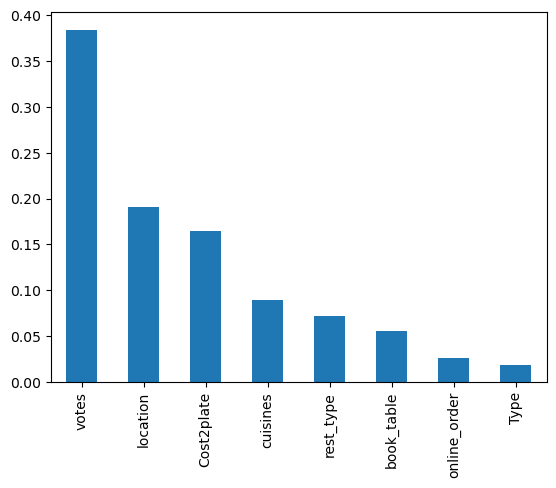

In [155]:
feat_importances.sort_values(ascending=False).plot(kind='bar')

In [156]:
X_imp = X[feat_importances.nlargest(6).index]

In [157]:
X_imp

,votes,location,Cost2plate,cuisines,rest_type,book_table
3,88,0,300.0,0,2,1
4,166,6,600.0,1,0,1
5,286,6,600.0,36,0,1
6,8,1,800.0,1,0,1
8,324,0,700.0,1,3,1
...,...,...,...,...,...,...
51712,27,16,1500.0,1,1,1
51713,0,16,600.0,44,1,1
51714,0,16,2000.0,44,1,1
51715,236,1,2500.0,44,1,0


In [158]:
X_train,X_test,y_train,y_test = train_test_split(X_imp,y,test_size =0.2,random_state = 14)

In [159]:
rf_model = RandomizedSearchCV(estimator = RF,param_distributions = random_grid,cv=4,random_state = 0)
rf_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4,
                   estimator=RandomForestRegressor(max_depth=29,
                                                   max_features='log2',
                                                   min_samples_leaf=2,
                                                   n_estimators=400),
                   param_distributions={'max_depth': [5, 11, 17, 23, 29, 35, 41,
                                                      47],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 50],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=0)

In [161]:
RF = RandomForestRegressor()
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score*100)
print('test_score = ',test_score*100)

rmse_train =  0.07042388093720298
rmse_test =  0.16221759518639067
train_score =  96.4643223358488
test_score =  81.66687749692136


After the random forest, I get accuracy for Train and test (96.43 and 78.57), however,

I need to find the hyperparameters accuracy for training and testing (86.16 and 67.44), then

I wanted to do Feature Selection Technique accuracy for Train and test ( 96.48 and 81.55).

For three techniques, I want to take the feature technique because it gives me the best accuracy for my data with out overfiting.

# conclusion:-

**I got accuracy of train data is 16.12 and test data is 16.22 from Linear regrestion** 

**I got accuracy of Train and test ( 98.83 and 73.12) from Decision Tree.**

**I got accuracy of Train and test ( 96.48 and 81.55) from Random Forest.**

**Finally, i got best accuracy from Random Forest without overfiting and underfiting as well.**

🍽️ Unraveling the Finest Restaurants in Bangalore: A Zomato Data Exploration 🚀

In my recent project, I embarked on a captivating journey through real-time Zomato data, unearthing valuable insights into Bangalore's restaurant landscape. Leveraging a myriad of techniques, I discovered key trends and noteworthy achievements that shed light on the city's culinary scene. Allow me to share some of the fascinating findings:

🏢 **Location Matters**: My analysis revealed that BTM boasts the highest number of restaurants, while Domlur offers a more intimate dining experience with the lowest count of culinary establishments.

💻 **Embracing Online Orders**: A substantial number of restaurants in the dataset welcome online orders (Yes), showcasing the industry's modern approach to digital convenience.

🌐 **Location Influence on Online Orders**: Interestingly, certain areas like BTM have embraced online ordering more fervently than others, such as Domlur, indicating distinct consumer preferences across locales.

📅 **Booking Tables with Finesse**: Delving into Koramangala's 5th block, I unearthed a penchant for table reservations, while BTM demonstrated a preference for a walk-in dining experience.

🍻 **Pubs and Bars Triumph**: Pubs and bars garnered impressive ratings on average, hinting at Bangalore's vibrant nightlife and discerning pub-goers.

🛵 **Dine-out or Delivered Delicacies**: BTM emerged as a hotbed for both delivery and dine-out restaurants, catering to varied dining needs.

🗳️ **Powerful Voting in Koramangala 5th Block**: This locale, Koramangala's 5th Block, garnered significant votes, reflecting a bustling and engaged culinary community.

📊 **Modeling Marvels**: Employing Linear Regression, Decision Trees, and Random Forest models, I made predictions on various aspects of the dataset. The Random Forest model showcased exceptional performance with a remarkable 96.48% accuracy on the train set and an impressive 81.55% accuracy on the test set, all while maintaining an optimal balance between overfitting and underfitting.